In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Carregando os dados

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [3]:
# Total de linhas e colunas
df.shape

(500, 2)

In [4]:
# Tipos de dados das colunas
df.dtypes

horas_estudo_mes    float64
salario             float64
dtype: object

Análise Exploratória

In [5]:
# Resumo estatístico
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [6]:
# Verificar se existem valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [7]:
# Matriz de correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


Podemos ver que há uma correlação forte e positiva entre as variáveis, ou seja, a medida que uma variável aumenta, a outra também aumenta.

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

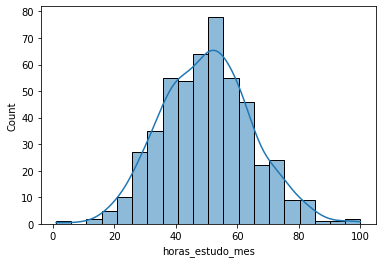

In [8]:
# Histograma da variável preditora
sns.histplot(data=df, x = 'horas_estudo_mes', kde=True)

Preparação dos Dados

In [9]:
# Prepara a variavel de entreda X em um array, pois o scikit-learn espera receber o dado de entrada no formato de matriz 
X = np.array(df['horas_estudo_mes'])
X

array([ 57.,  48.,  60.,  73.,  46.,  46.,  74.,  62.,  43.,  58.,  43.,
        43.,  54.,  21.,  24.,  42.,  35.,  55.,  36.,  29.,  72.,  47.,
        51.,  29.,  42.,  52.,  33.,  56.,  41.,  46.,  41.,  78.,  50.,
        34.,  62.,  32.,  53.,  21.,  30.,  53.,  61.,  53.,  48.,  45.,
        28.,  39.,  43.,  66.,  55.,  24.,  55.,  44.,  40.,  59.,  65.,
        64.,  37.,  45.,  55.,  65.,  43.,  47.,  33.,  32.,  62.,  70.,
        49.,  65.,  55.,  40.,  55.,  73.,  49.,  73.,  11.,  62.,  51.,
        46.,  51.,  20.,  47.,  55.,  72.,  42.,  38.,  42.,  64.,  55.,
        42.,  58.,  51.,  65.,  39.,  45.,  44.,  28.,  54.,  54.,  50.,
        46.,  29.,  44.,  45.,  38.,  48.,  56.,  78.,  53.,  54.,  49.,
        21.,  50.,  51.,  87.,  47.,  55.,  49.,  32.,  67.,  61.,  62.,
        36.,  71.,  29.,  59.,  83.,  35.,  42.,  51.,  42.,  27.,  51.,
        34.,  57.,  36.,  73.,  38.,  45.,  62.,  32.,  53.,  70.,  26.,
        53.,  54.,  62.,  31.,  30.,  58.,  54.,  5

In [10]:
# Também podemos preparar o X da seguinte forma
X = df['horas_estudo_mes'].values
X

array([ 57.,  48.,  60.,  73.,  46.,  46.,  74.,  62.,  43.,  58.,  43.,
        43.,  54.,  21.,  24.,  42.,  35.,  55.,  36.,  29.,  72.,  47.,
        51.,  29.,  42.,  52.,  33.,  56.,  41.,  46.,  41.,  78.,  50.,
        34.,  62.,  32.,  53.,  21.,  30.,  53.,  61.,  53.,  48.,  45.,
        28.,  39.,  43.,  66.,  55.,  24.,  55.,  44.,  40.,  59.,  65.,
        64.,  37.,  45.,  55.,  65.,  43.,  47.,  33.,  32.,  62.,  70.,
        49.,  65.,  55.,  40.,  55.,  73.,  49.,  73.,  11.,  62.,  51.,
        46.,  51.,  20.,  47.,  55.,  72.,  42.,  38.,  42.,  64.,  55.,
        42.,  58.,  51.,  65.,  39.,  45.,  44.,  28.,  54.,  54.,  50.,
        46.,  29.,  44.,  45.,  38.,  48.,  56.,  78.,  53.,  54.,  49.,
        21.,  50.,  51.,  87.,  47.,  55.,  49.,  32.,  67.,  61.,  62.,
        36.,  71.,  29.,  59.,  83.,  35.,  42.,  51.,  42.,  27.,  51.,
        34.,  57.,  36.,  73.,  38.,  45.,  62.,  32.,  53.,  70.,  26.,
        53.,  54.,  62.,  31.,  30.,  58.,  54.,  5

In [11]:
# Prepara a variável alvo, de saída
y = df['salario']

In [12]:
# Ajusta o shape de X  
X = X.reshape(-1, 1)

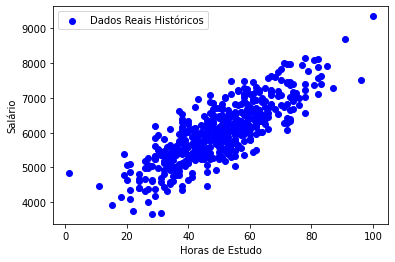

In [14]:
# Gráfico de dispersão entre X e y para verficar se há relação entre eles
plt.scatter(X, y, color='b', label='Dados Reais Históricos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show();

In [15]:
# Dividir dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(400, 1)

In [17]:
X_test.shape

(100, 1)

In [18]:
y_train.shape

(400,)

In [19]:
y_test.shape

(100,)

#### Modelagem Preditiva

In [20]:
# Cria o modelo de regressao linear simples
modelo = LinearRegression()

In [21]:
# Treina o modelo
modelo.fit(X_train, y_train)

LinearRegression()

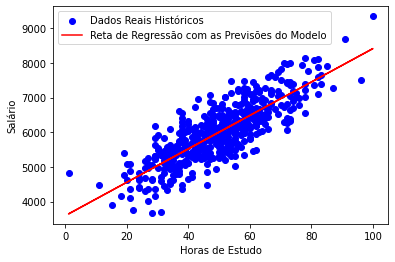

In [22]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color='blue', label='Dados Reais Históricos')
plt.plot(X, modelo.predict(X), color='r', label='Reta de Regressão com as Previsões do Modelo')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [23]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_test, y_test)
print(f'Coeficiente R²: {score:.2f}')

Coeficiente R²: 0.59


Por ser a primeira versão do modelo, sem qualquer ajuste, esse coeficiente está bom (vai de 0 a 1)

In [24]:
# Intercepto = parâmetro w0
modelo.intercept_

3596.783724372753

In [25]:
# Slope = parâmetro w1
modelo.coef_

array([48.18185277])

Deploy do Modelo

In [26]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]])

In [29]:
# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)
print(f'Estudando cerca de {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}')

Estudando cerca de [[48]] horas por mês, seu salário pode ser igual a [5909.5126574]


In [30]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
salario = modelo.intercept_ + modelo.coef_ * horas_estudo_novo
print(salario)

[[5909.5126574]]


In [34]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Previsão do salário
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Com {horas_estudo_novo} horas de estudo por mês, seu salário pode ser igual a {salario_previsto}')

Com [[65]] horas de estudo por mês, seu salário pode ser igual a [6728.60415452]
